# Photometry in pycoco

---------------------

## Introduction
This notebook aims to serve as a short tutorial (along with the others in this directory). In this notebook, the tools for adding/testing/plotting photometry in **`pycoco`**, as a companion to the **`c`** code **`CoCo`**.

**`CoCo`** takes photometry data in one input phot file. **`pycoco`** can be used to (*hopefully*) easily wrangle your exisiting photometry into the correct format.

In [254]:
from __future__ import print_function ## Force python3-like printing

%matplotlib inline
from matplotlib import pyplot as plt

import os

import pycoco as pcc

reload(pcc) ## FOR DEV

<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.py'>

## Using `PhotometryClass`

### `PhotometryClass` methods and variables

Photometry in **`pycoco`** is handled using **`PhotometryClass`** which has the methods and variables:

**`PhotometryClass.__init__`**

**`PhotometryClass._get_data_directory`**

**`PhotometryClass._combine_phot`**


**`PhotometryClass.set_data_directory`**

**`PhotometryClass.load_phot_from_file`**

**`PhotometryClass.load_phot_ap_tables`**

**`PhotometryClass.load`**

**`PhotometryClass.save`**

**`PhotometryClass.plot`**

**`PhotometryClass.save_phot`**


**`PhotometryClass._default_data_dir_path`**

In [255]:
P = pcc.PhotometryClass()

You can load in phot files one by one, or you can use the **`PhotometryClass.load()`** method. 

In [256]:
P.load()

Oops! We need to provide a SN name!

In [257]:
P.load(snname = 'SN2005bf')

Found: 
['SN1998bw.json', 'SN2005bf_B.dat', 'SN2005bf_SDSS_g.dat', 'SN2005bf_SDSS_i.dat', 'SN2005bf_SDSS_r.dat', 'SN2005bf_V.dat']
Matched:
['/Users/berto/Code/verbose-enigma/testdata/SN2005bf_B.dat', '/Users/berto/Code/verbose-enigma/testdata/SN2005bf_SDSS_g.dat', '/Users/berto/Code/verbose-enigma/testdata/SN2005bf_SDSS_i.dat', '/Users/berto/Code/verbose-enigma/testdata/SN2005bf_SDSS_r.dat', '/Users/berto/Code/verbose-enigma/testdata/SN2005bf_V.dat']
/Users/berto/Code/verbose-enigma/testdata/SN2005bf_B.dat
1 B B
foo
foo
/Users/berto/Code/verbose-enigma/testdata/SN2005bf_SDSS_g.dat
1 SDSS_g SDSS_g
foo
foo
/Users/berto/Code/verbose-enigma/testdata/SN2005bf_SDSS_i.dat
1 SDSS_i SDSS_i
foo
foo
/Users/berto/Code/verbose-enigma/testdata/SN2005bf_SDSS_r.dat
1 SDSS_r SDSS_r
foo
foo
/Users/berto/Code/verbose-enigma/testdata/SN2005bf_V.dat
1 V V
foo
foo


The operation has run with `verbose = True`, so it has spat out quite a bit of information. Namely, it found 6 files in the (default) data directory. 
5 of these matched the specified SN name (SN2005bf). The full filepaths of these was printed as the files were iterated over and loaded in to **`astropy`** tables. The filters from the file data and file names are printed, and all seem to match.

Let's take a look at what is now in our PhotometryClass instance:

In [258]:
P.__dict__.keys()

['phot',
 'filter_directory',
 '_default_filter_dir_path',
 'data_directory',
 'data_filters',
 '_default_data_dir_path',
 'data']

Let's look at the data that was loaded in:

In [259]:
P.data.keys()

['B', 'SDSS_g', 'SDSS_i', 'SDSS_r', 'V']

In [260]:
P.data['B'].show_in_notebook()

idx,MJD,flux,flux_err,filter
,,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),
0,53467.7,3.739383e-16,5.510559e-18,B
1,53468.6,4.119078e-16,6.070097e-18,B
2,53472.6,5.613064e-16,8.271717e-18,B
3,53473.6,5.872189e-16,8.653577e-18,B
4,53474.6,5.953879e-16,8.77396e-18,B
5,53475.6,5.997911e-16,8.838848e-18,B
6,53476.6,5.765009e-16,8.495631e-18,B
7,53477.6,5.551368e-16,8.180798e-18,B
8,53478.6,5.330893e-16,7.855895e-18,B


This is good - all of the found photometry has been read in. 

If you have photometry that is already in **`astropy`** tables, then you can load it in using **`PhotometryClass.load_phot_ap_tables`**. There must be columns labelled `MJD`, `flux`, `flux_err` and `filter`.

What we will demonstrate now is associating **`FilterClass`** with the photometry. **`PhotometryClass`** knows about the default filter directory (but another can be specified using **`PhotometryClass.set_filter_directory`**):

In [261]:
P.filter_directory

'/Users/berto/Code/CoCo/data/filters'

The **`PhotometryClass.load()`** method automatically searches the filter directory for the appropriate filters, and loads them in. For more on **`pycocoo.FilterClass`** see `pycoco_adding_filters.ipynb`.

If we take a look, we can see that we have 5 **`FilterClass`** instances, one for each of the photometry files.

In [262]:
P.data_filters

OrderedDict([('B', <pycoco.FilterClass instance at 0x10b5b4830>),
             ('SDSS_g', <pycoco.FilterClass instance at 0x10b2c2ab8>),
             ('SDSS_i', <pycoco.FilterClass instance at 0x10b78d878>),
             ('SDSS_r', <pycoco.FilterClass instance at 0x1099d10e0>),
             ('V', <pycoco.FilterClass instance at 0x10b2c2bd8>)])

We can have a look at the spectral coverage of the photometry by using the **`PhotometryClass.plot_filters()`** method:

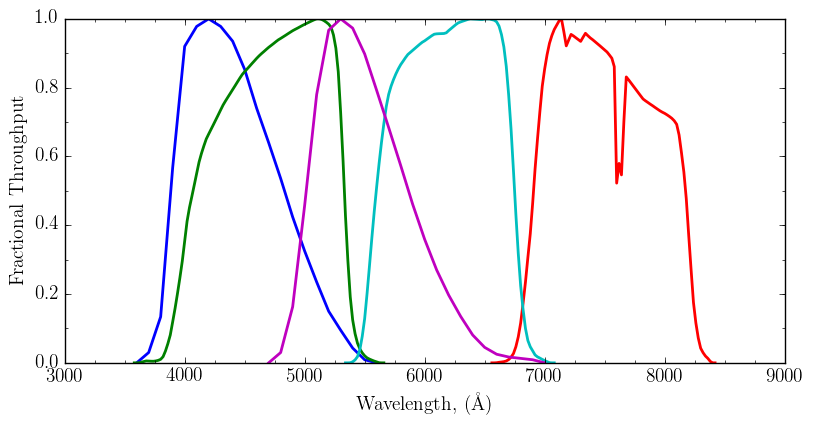

In [263]:
P.plot_filters(legend = False)

In [264]:
P.phot.show_in_notebook()

idx,MJD,flux,flux_err,filter
,,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),
0,53467.7,3.739383e-16,5.510559e-18,B
1,53468.6,4.119078e-16,6.070097e-18,B
2,53472.6,5.613064e-16,8.271717e-18,B
3,53473.6,5.872189e-16,8.653577e-18,B
4,53474.6,5.953879e-16,8.77396e-18,B
5,53475.6,5.997911e-16,8.838848e-18,B
6,53476.6,5.765009e-16,8.495631e-18,B
7,53477.6,5.551368e-16,8.180798e-18,B
8,53478.6,5.330893e-16,7.855895e-18,B
